In [1]:
from sklearn.datasets import load_boston
import redis
r = redis.Redis()

In [2]:
boston = load_boston()

In [3]:
boston_RM = boston.data[:,5]
boston_PRICE = boston.target

In [4]:
x_train = boston_RM[:400].reshape(-1, 1)
x_test = boston_RM[400:].reshape(-1, 1)
y_train = boston.target[:400]
y_test = boston.target[400:]

In [5]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

coef = lm.coef_[0]
intercept = lm.intercept_
print('Coef: {coef}, Intercept: {int}'.format(coef=coef, int=intercept))
r.mset({"Coef": coef, "intercept": intercept})

Coef: 9.40550211551793, Intercept: -35.26094818316345


True

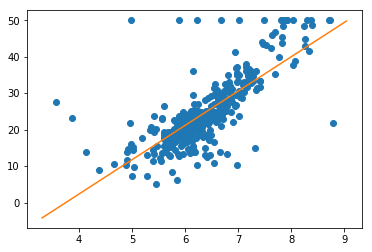

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_train, y_train,'o')

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = float(r.get("intercept")) + float(r.get("Coef")) * x_vals
plt.plot(x_vals, y_vals, '-')

plt.show()